In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [4]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [5]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(10, activation = "softmax" )]) 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [8]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7118 - accuracy: 0.7648 - val_loss: 0.4943 - val_accuracy: 0.8330
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4888 - accuracy: 0.8283 - val_loss: 0.4452 - val_accuracy: 0.8442
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4445 - accuracy: 0.8445 - val_loss: 0.4301 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4193 - accuracy: 0.8521 - val_loss: 0.3905 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3998 - accuracy: 0.8597 - val_loss: 0.3799 - val_accuracy: 0.8716
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3848 - accuracy: 0.8644 - val_loss: 0.3834 - val_accuracy: 0.8692
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3712 - accuracy: 0.8685 - val_loss: 0.3760 - val_accuracy:

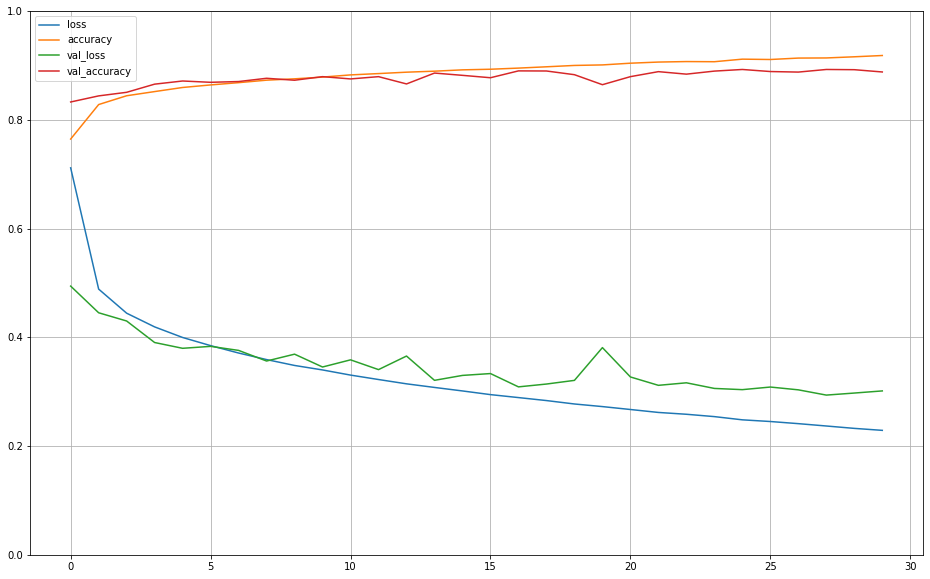

In [9]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3316 - accuracy: 0.8812


[0.33164915442466736, 0.8812000155448914]

In [12]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.24, 0.  , 0.01, 0.  , 0.  , 0.  , 0.75, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

# Regression

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [36]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)


In [41]:
model_regression = keras.models.Sequential([keras.layers.Dense(30, activation='relu', input_shape = X_train.shape[1:]),
keras.layers.Dense(1)])

In [44]:
model_regression.compile(loss='mean_squared_error', optimizer='sgd')

In [47]:
model_regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [50]:
history_regrsssion = model_regression.fit(X_train, y_train, epochs = 20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8350 - val_loss: 0.5425
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.5183 - val_loss: 0.5830
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4987 - val_loss: 0.5689
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4667 - val_loss: 0.4473
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4495 - val_loss: 0.4277
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4317 - val_loss: 0.4244
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4251 - val_loss: 0.4189
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4207 - val_loss: 0.4049
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4177 - val_loss: 0.4884
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4363 - val_loss: 0.3974

In [51]:
mse_test = model_regression.evaluate(X_test,y_test)

162/162 [==============================] - 0s 3ms/step - loss: 48642.1289


In [54]:
X_new = X_test[:3]
y_pred = model_regression.predict(X_new)
y_pred

array([[274.8577 ],
       [200.15028],
       [206.6821 ]], dtype=float32)

In [2]:
# TODO: add RNN to solve MNIST Fashion

In [3]:
# TODO: Format document into sections based on approach